## Correlation calculations between worship centres and foreign inhabitants distribution

To run this code you need to have the personalised file "foreign_faith_distribution.json", a geodataframe generated by the "Extract_info_datasets.ipynb" notebook.

We calculate and plot the Pearson correlation (linear) between the foreign distribution and two different variables: 

- Nº of centres for different faiths
- The Shannon-Wiener index

We also assess the significance of these correlations.

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import PowerNorm
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import scipy.stats as stats

LOAD THE FILE WITH ALL THE VARIABLES

In [37]:
foreign_faith_distribution = gpd.read_file("foreign_faith_distribution.json")  

## Pearson correlation for the Nº of centres and assesment of the result

Linear correlation using the z-score normalized variables.

In [38]:
# Calcular las correlaciones
correlation_catholic = foreign_faith_distribution['Zscore_catholic_2021'].corr(foreign_faith_distribution['Zscore_foreign_2021'])
correlation_evangelical = foreign_faith_distribution['Zscore_evangelical_2021'].corr(foreign_faith_distribution['Zscore_foreign_2021'])
correlation_islam = foreign_faith_distribution['Zscore_islam_2021'].corr(foreign_faith_distribution['Zscore_foreign_2021'])
correlation_others = foreign_faith_distribution['Zscore_others_2021'].corr(foreign_faith_distribution['Zscore_foreign_2021'])

# Mostrar resultados con error
# Número de observaciones
n = len(foreign_faith_distribution)

# Cálculo del error estándar para cada correlación
SE_catholic = (1 - correlation_catholic**2) / (n - 2)**0.5
SE_evangelical = (1 - correlation_evangelical**2) / (n - 2)**0.5
SE_islam = (1 - correlation_islam**2) / (n - 2)**0.5
SE_others = (1 - correlation_others**2) / (n - 2)**0.5

# Imprimir correlaciones con su error estándar
print(f"Correlación entre centros católicos y población extranjera: {correlation_catholic:.2f} ± {SE_catholic:.2f}")
print(f"Correlación entre centros evangélicos y población extranjera: {correlation_evangelical:.2f} ± {SE_evangelical:.2f}")
print(f"Correlación entre centros islámicos y población extranjera: {correlation_islam:.2f} ± {SE_islam:.2f}")
print(f"Correlación entre otros centros y población extranjera: {correlation_others:.2f} ± {SE_others:.2f}")


Correlación entre centros católicos y población extranjera: 0.77 ± 0.01
Correlación entre centros evangélicos y población extranjera: 0.98 ± 0.00
Correlación entre centros islámicos y población extranjera: 0.92 ± 0.01
Correlación entre otros centros y población extranjera: 0.98 ± 0.00


WE CHECK THE DISTRIBUTIONS TO CHECK THERE IS NO BIAS IN THE CALCULATION

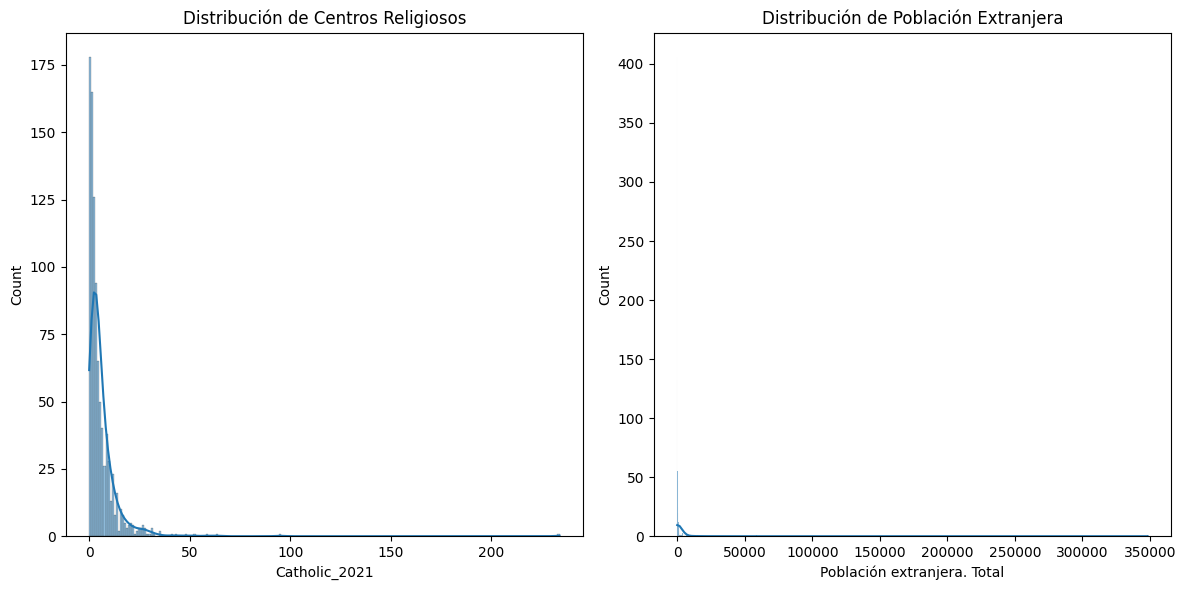

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver la distribución de los datos antes de la normalización
plt.figure(figsize=(12, 6))

# Histograma de los centros religiosos y la población extranjera
plt.subplot(1, 2, 1)
sns.histplot(foreign_faith_distribution['Catholic_2021'], kde=True)
plt.title('Distribución de Centros Religiosos')

plt.subplot(1, 2, 2)
sns.histplot(foreign_faith_distribution['Población extranjera. Total'], kde=True)
plt.title('Distribución de Población Extranjera')

plt.tight_layout()
plt.show()


WE CHECK WE OBTAIN SIMILAR RESULTS FOR THE NON-NORMALISED VARIABLES

In [40]:
correlation_before_normalization = foreign_faith_distribution['Islam_2021'].corr(foreign_faith_distribution['Población extranjera. Total'])
print(f"Correlación antes de normalizar: {correlation_before_normalization:.3f}")


Correlación antes de normalizar: 0.916


WE CHECK THE RESULT IS SIMILAR WITH AN ALTERNATIVE NORMALISATION

In [41]:
# Normalización Min-Max (escala de 0 a 1)
foreign_faith_distribution['MinMax_catholic_2021'] = (
    foreign_faith_distribution['Catholic_2021'] - foreign_faith_distribution['Catholic_2021'].min()
) / (foreign_faith_distribution['Catholic_2021'].max() - foreign_faith_distribution['Catholic_2021'].min())

foreign_faith_distribution['MinMax_foreign_2021'] = (
    foreign_faith_distribution['Población extranjera. Total'] - foreign_faith_distribution['Población extranjera. Total'].min()
) / (foreign_faith_distribution['Población extranjera. Total'].max() - foreign_faith_distribution['Población extranjera. Total'].min())

# Calcular la correlación con las variables Min-Max
correlation_minmax_catholic = foreign_faith_distribution['MinMax_catholic_2021'].corr(foreign_faith_distribution['MinMax_foreign_2021'])
print(f"Correlación con Min-Max: {correlation_minmax_catholic:.3f}")


Correlación con Min-Max: 0.774


We conclude the high correlations are calculated with no apparent issues, so they should be representative and not due to an error in normalisation or the calculation itself (made with Python libray)

## Significance t test

We realise a t test to analyse the significance of our results. This will tell us if the variables have a truly strong correlation.

In [42]:
# Número de observaciones
n = len(foreign_faith_distribution)

# Función para calcular el valor t y el valor p para una correlación
def test_significance(correlation, n):
    t_stat = correlation * ((n - 2)**0.5) / ( (1 - correlation**2)**0.5 )
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-2))  # dos colas
    return t_stat, p_value

# Evaluar la significancia para cada correlación
t_catholic, p_catholic = test_significance(correlation_catholic, n)
t_evangelical, p_evangelical = test_significance(correlation_evangelical, n)
t_islam, p_islam = test_significance(correlation_islam, n)
t_others, p_others = test_significance(correlation_others, n)

# Mostrar resultados
print("Resultados de la prueba de hipótesis para cada correlación:")
print(f"Católicos: t = {t_catholic:.3f}, p = {p_catholic:.3f}")
print(f"Evangelicos: t = {t_evangelical:.3f}, p = {p_evangelical:.3f}")
print(f"Islam: t = {t_islam:.3f}, p = {p_islam:.3f}")
print(f"Otros: t = {t_others:.3f}, p = {p_others:.3f}")

# Interpretación basada en un umbral de significancia de 0.05
alpha = 0.05
def interpret_result(p_value):
    if p_value < alpha:
        return "significativa"
    else:
        return "no significativa"

print("\nInterpretación de los resultados:")
print(f"Católicos: {interpret_result(p_catholic)}")
print(f"Evangelicos: {interpret_result(p_evangelical)}")
print(f"Islam: {interpret_result(p_islam)}")
print(f"Otros: {interpret_result(p_others)}")


Resultados de la prueba de hipótesis para cada correlación:
Católicos: t = 37.612, p = 0.000
Evangelicos: t = 138.224, p = 0.000
Islam: t = 69.980, p = 0.000
Otros: t = 161.158, p = 0.000

Interpretación de los resultados:
Católicos: significativa
Evangelicos: significativa
Islam: significativa
Otros: significativa


## Significance z test

We realise a z test to analyse the significance of our results.Since the t test give a huge correlation, we use this test that might be more appropiate for big samples as ours (size of the sample = nº of municipalities).

In [43]:
import numpy as np
import scipy.stats as stats

# Número de observaciones
n = len(foreign_faith_distribution)

# Función para calcular el Z-Test para la correlación de Pearson
def z_test_pearson(correlation, n):
    # Transformación de Fisher
    z = 0.5 * np.log((1 + correlation) / (1 - correlation))
    
    # Desviación estándar de z
    std_dev_z = 1 / np.sqrt(n - 3)
    
    # Z-score estandarizado
    z_standardized = z / std_dev_z
    
    # Valor p a partir de la distribución normal estándar (dos colas)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_standardized)))  # Dos colas
    
    return z_standardized, p_value

# Evaluar la significancia para cada correlación usando Z-Test
z_catholic, p_catholic = z_test_pearson(correlation_catholic, n)
z_evangelical, p_evangelical = z_test_pearson(correlation_evangelical, n)
z_islam, p_islam = z_test_pearson(correlation_islam, n)
z_others, p_others = z_test_pearson(correlation_others, n)

# Mostrar resultados
print("Resultados del Z-Test para cada correlación:")
print(f"Católicos: z = {z_catholic:.3f}, p = {p_catholic:.3f}")
print(f"Evangelicos: z = {z_evangelical:.3f}, p = {p_evangelical:.3f}")
print(f"Islam: z = {z_islam:.3f}, p = {p_islam:.3f}")
print(f"Otros: z = {z_others:.3f}, p = {p_others:.3f}")

# Interpretación basada en un umbral de significancia de 0.05
alpha = 0.05
def interpret_result(p_value):
    if p_value < alpha:
        return "significativa"
    else:
        return "no significativa"

print("\nInterpretación de los resultados:")
print(f"Católicos: {interpret_result(p_catholic)}")
print(f"Evangelicos: {interpret_result(p_evangelical)}")
print(f"Islam: {interpret_result(p_islam)}")
print(f"Otros: {interpret_result(p_others)}")


Resultados del Z-Test para cada correlación:
Católicos: z = 31.675, p = 0.000
Evangelicos: z = 67.858, p = 0.000
Islam: z = 47.956, p = 0.000
Otros: z = 72.477, p = 0.000

Interpretación de los resultados:
Católicos: significativa
Evangelicos: significativa
Islam: significativa
Otros: significativa


## SCATTERING PLOTS

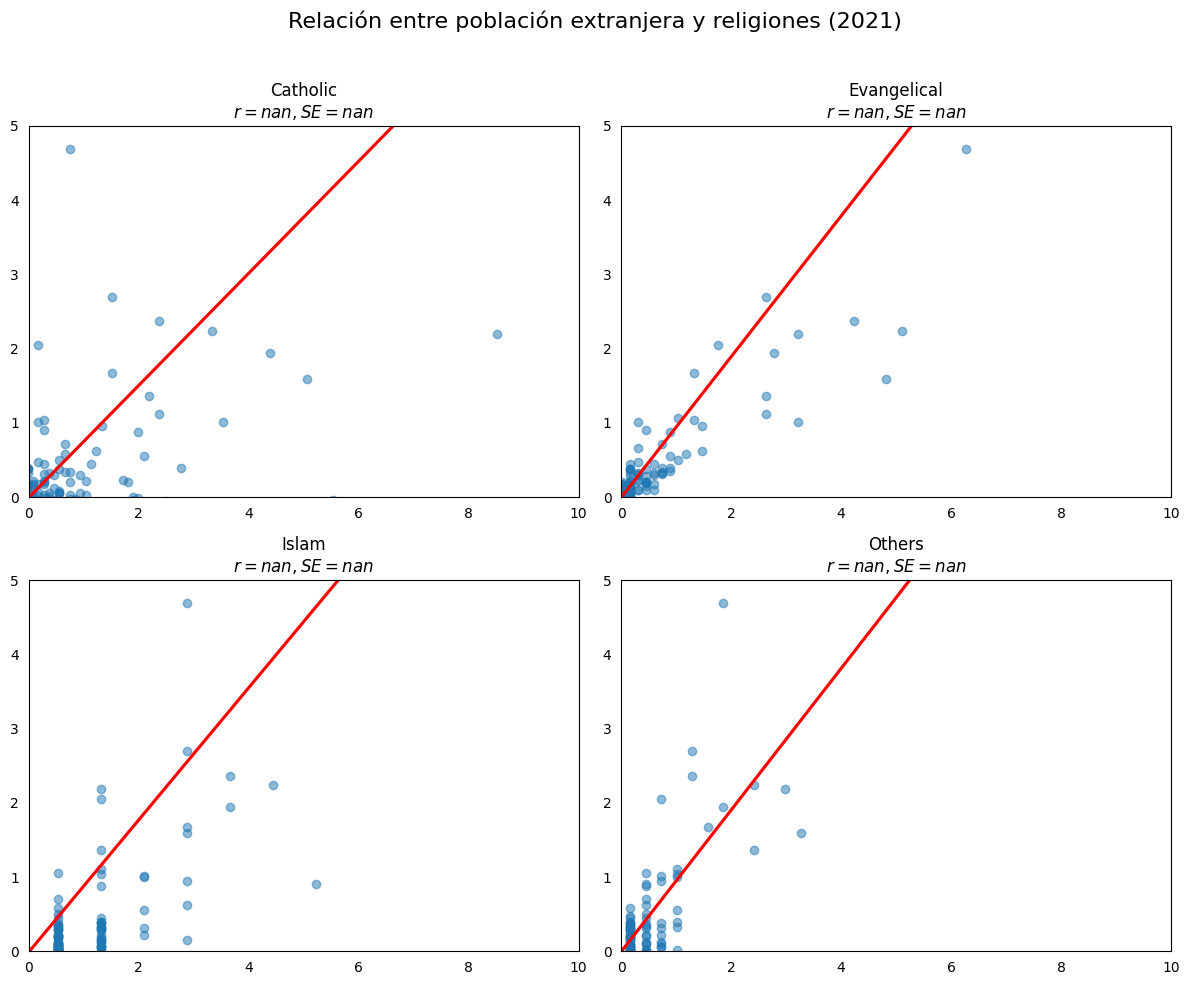

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Subgráficos para cada correlación
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Definir los pares de datos y los títulos
pairs = [
    ('Zscore_catholic_2021', 'Catholic'),
    ('Zscore_evangelical_2021', 'Evangelical'),
    ('Zscore_islam_2021', 'Islam'),
    ('Zscore_others_2021', 'Others')
]

# Iterar y graficar con las modificaciones solicitadas
for ax, (column, title) in zip(axes.flat, pairs):
    try:
        # Realizar la regresión lineal para obtener correlación y error
        slope, intercept, r_value, p_value, std_err = linregress(
            foreign_faith_distribution[column],
            foreign_faith_distribution['Zscore_foreign_2021']
        )
        
        # Graficar la regresión
        sns.regplot(
            x=foreign_faith_distribution[column],
            y=foreign_faith_distribution['Zscore_foreign_2021'],
            ax=ax,
            line_kws={"color": "red"},
            scatter_kws={"alpha": 0.5},
            ci=None  # Quitar la sombra para un gráfico más limpio
        )
        
        # Personalizar el gráfico
        ax.set_title(f"{title}\n$r={r_value:.2f}, SE={std_err:.2f}$")  # Mostrar correlación y error en el título
        ax.tick_params(axis='both', which='both', bottom=False, left=False)  # Quitar ticks
        
        # Limitar ejes
        ax.set_ylim(0, 5)  # Limitar el eje Y a valores no negativos
        ax.set_xlim(0, 10)
        
        # Eliminar las etiquetas de los ejes
        ax.set_xlabel("")
        ax.set_ylabel("")
    
    except Exception as e:
        print(f"Error en la regresión para {title}: {e}")

# Título principal y ajuste del diseño
plt.suptitle("Relación entre población extranjera y religiones (2021)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## RADAR CHART PLOT

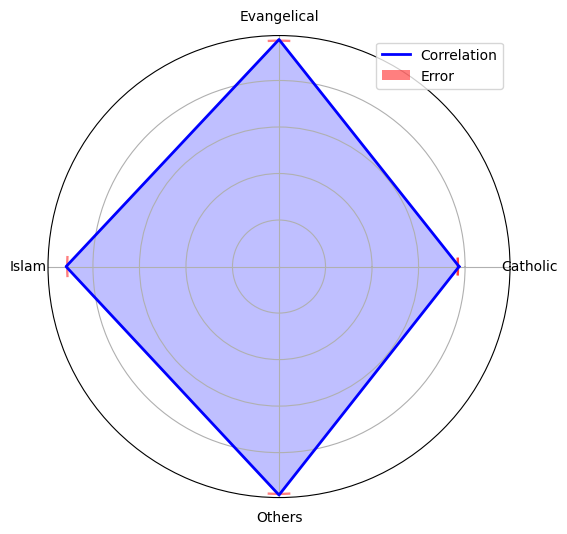

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Correlaciones y errores
correlations = {
    'Catholic': correlation_catholic, 
    'Evangelical': correlation_evangelical, 
    'Islam': correlation_islam, 
    'Others': correlation_others
}
errors = {
    'Catholic': 0.01, 
    'Evangelical': 0.01, 
    'Islam': 0.01, 
    'Others': 0.01
}

# Crear una lista de categorías
categories = list(correlations.keys())

# Convertir las correlaciones y errores en arrays de numpy
correlation_values = np.array(list(correlations.values()))
error_values = np.array(list(errors.values()))

# Número de categorías (en este caso son 4)
num_vars = len(categories)

# Ángulos de cada categoría para el gráfico radar (equidistantes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Cerrar el gráfico uniendo el último punto con el primero
correlation_values = np.concatenate((correlation_values,[correlation_values[0]]))
error_values = np.concatenate((error_values,[error_values[0]]))
angles += angles[:1]

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar las correlaciones
ax.plot(angles, correlation_values, color='blue', linewidth=2, label='Correlation')

# Rellenar las áreas del gráfico
ax.fill(angles, correlation_values, color='blue', alpha=0.25)

# Graficar los errores como barras
ax.bar(angles, error_values, width=0.1, bottom=correlation_values - error_values, color='red', alpha=0.5, label='Error')

# Personalizar el gráfico
ax.set_yticklabels([])  # Quitar las etiquetas del eje radial
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título del gráfico
plt.title("", fontsize=16)

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

#SAVE
plt.savefig('correlation_radar_chart.jpg', bbox_inches='tight')

## Same correlation calculation for the Shannon-Wiener index

CORRELATIONS

In [46]:
# Calcular las correlaciones entre el Índice de Shannon-Wiener y la población extranjera
correlation_shannon_foreign = foreign_faith_distribution['Zscore_Shannon_2021'].corr(foreign_faith_distribution['Zscore_foreign_2021'])

# Número de observaciones
n = len(foreign_faith_distribution)

# Cálculo del error estándar para la correlación
SE_shannon_foreign = (1 - correlation_shannon_foreign**2) / (n - 2)**0.5

# Imprimir la correlación con su error estándar
print(f"Correlación entre el Índice de Shannon-Wiener y la población extranjera: {correlation_shannon_foreign:.2f} ± {SE_shannon_foreign:.2f}")

Correlación entre el Índice de Shannon-Wiener y la población extranjera: 0.27 ± 0.03


Z TEST

In [47]:
import numpy as np
import scipy.stats as stats

# Correlación entre el Índice de Shannon-Wiener y la población extranjera
correlation_shannon_foreign = foreign_faith_distribution['Normalized_Shaw_Idx'].corr(foreign_faith_distribution['Zscore_foreign_2021'])

# Número de observaciones
n = len(foreign_faith_distribution)

# Función para calcular el Z-Test para la correlación de Pearson
def z_test_pearson(correlation, n):
    # Transformación de Fisher
    z = 0.5 * np.log((1 + correlation) / (1 - correlation))
    
    # Desviación estándar de z
    std_dev_z = 1 / np.sqrt(n - 3)
    
    # Z-score estandarizado
    z_standardized = z / std_dev_z
    
    # Valor p a partir de la distribución normal estándar (dos colas)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_standardized)))  # Dos colas
    
    return z_standardized, p_value

# Realizar el Z-test para la correlación entre el Índice de Shannon-Wiener y la población extranjera
z_shannon_foreign, p_shannon_foreign = z_test_pearson(correlation_shannon_foreign, n)

# Mostrar resultados del Z-test
print("Resultado del Z-Test para la correlación entre el Índice de Shannon-Wiener y la población extranjera:")
print(f"z = {z_shannon_foreign:.3f}, p = {p_shannon_foreign:.3f}")

# Interpretación basada en un umbral de significancia de 0.05
alpha = 0.05
def interpret_result(p_value):
    if p_value < alpha:
        return "significativa"
    else:
        return "no significativa"

print("\nInterpretación del resultado:")
print(f"Correlación entre el Índice de Shannon-Wiener y la población extranjera: {interpret_result(p_shannon_foreign)}")


Resultado del Z-Test para la correlación entre el Índice de Shannon-Wiener y la población extranjera:
z = 8.594, p = 0.000

Interpretación del resultado:
Correlación entre el Índice de Shannon-Wiener y la población extranjera: significativa


## EVEN IF LESS CORRELATED...
## THE RESULT STILLS WITH HUGE SIGNIFICANCE (p near 0) !!! 